# ANOVA ::

In [1]:
# importing the data

import pandas as pd

data = pd.read_csv("E:/Data Science/CSV dataset/StudentsPerformance.csv")
data.sort_values('race/ethnicity', inplace = True)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
778,female,group A,some college,standard,completed,72,79,82
546,female,group A,some high school,standard,completed,92,100,97
820,female,group A,some high school,standard,completed,85,90,92
741,female,group A,associate's degree,free/reduced,none,37,57,56
305,male,group A,some college,standard,none,69,67,69
...,...,...,...,...,...,...,...,...
297,male,group E,associate's degree,standard,completed,71,74,68
293,female,group E,bachelor's degree,standard,none,65,73,75
289,male,group E,some high school,standard,completed,77,76,77
206,male,group E,bachelor's degree,standard,none,82,62,62


# Analysis ::

  * ANOVA is a process of examining whether the mean of various sample population are same or not.

# Assumption :

  * All the samples taken are normally distributed.
  * All the samples are independent.
  * Samples are randomly taken
  

# Null Hypothesis :

   * All the means are same. 

# Alternative Hypothesis:

   * All the means are not same. Atlease one if different.

# Process::

  * Analysis of Variance tests if there is a similarity between the means of samples or not. 
  * ANOVA uses f-statistic value from the scipy model
  * f-test provides that f-value.

# Calculate F, a test statistic ::

   * scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
   * scipy.stats.f.cdf gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom.



In [2]:
# Sorting the data

data.sort_values(['race/ethnicity', 'gender'], inplace = True)

# Plotting the graph 

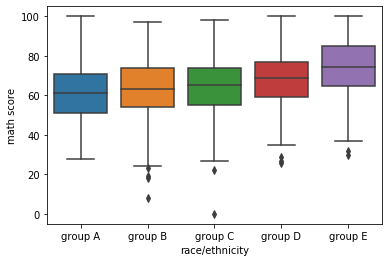

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'race/ethnicity', y = 'math score', data = data)


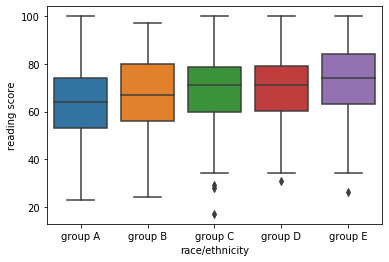

In [4]:
sns.boxplot(x = 'race/ethnicity', y = 'reading score', data = data)

In [5]:
df = data[['race/ethnicity', 'math score', 'reading score', 'writing score']]
df

,race/ethnicity,math score,reading score,writing score
778,group A,72,79,82
546,group A,92,100,97
820,group A,85,90,92
741,group A,37,57,56
972,group A,53,50,60
...,...,...,...,...
845,group E,90,85,84
297,group E,71,74,68
289,group E,77,76,77
206,group E,82,62,62


# Processing the data

  * Selecting only scores column and race/ethnicity for evaluation.
  * Using pd.melt to convert data into correct format.
  * Melt function is used to merge different columns into one as in unpoivoted table.

In [6]:
melt_df = pd.melt(df.reset_index(), id_vars = 'index', value_vars = ['math score', 'reading score','writing score'])
melt_df.columns = ['Index', 'Subject', 'Scores']
melt_df

,Index,Subject,Scores
0,778,math score,72
1,546,math score,92
2,820,math score,85
3,741,math score,37
4,972,math score,53
...,...,...,...
2995,845,writing score,84
2996,297,writing score,68
2997,289,writing score,77
2998,206,writing score,62


In [7]:
import scipy.stats as stats

crit_val = stats.f.ppf(q = 1 - 0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 degree of freedom with .95 confidence::  %3.4f'%crit_val)

F critical value for 2 and 60 degree of freedom with .95 confidence::  3.1504


In [8]:
p_value = 1 - stats.f.cdf(0.5, dfn = 2, dfd = 50)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 60 df with .95 confidence for the calculated F value 0.60953


Formulate an ANOVA table using statsmodels

   * statsmodels.formula.api.ols  creates a model from a formula and dataframe
   * statsmodels.api.sm.stats.anova_lm   gives an Anova table for one or more fitted linear models

In the formula. we know that

   * (~) ____: separates the left hand side of the model from the right hand side
   * (+) ____: adds new columns to the design matrix
   * ( : ) ____: adds a new column to the design matrix with the product of the other two columns
   * (*) ____: also adds the individual columns multiplied together along with their product
   * C() ____: operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.



In [9]:
# making the model

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Scores ~ C(Subject)', data = melt_df).fit()
model.summary()                                           #  Printing the model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.82
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.07e-05
Time:                        20:02:34   Log-Likelihood:                -12377.
No. Observations:                3000   AIC:                         2.476e+04
Df Residuals:                    2997   BIC:                         2.478e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      66.0890      0.474    139.432      0.000      65.160      67.018
C(Subject)[T.reading score]     3.0800      0.670      4.595      0.000       1.766       4.394
C(Subject)[T.writing score]     1.9650      0.670      2.931      0.003       0.651       3.279
==============================================================================
Omnibus:                       37.504   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.614
Skew:                          -0.276   Prob(JB):                     4.12e-09
Kurtosis:                       3.061   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Making ANOVA model

anova = sm.stats.anova_lm(model, typ = 2)
anova

,sum_sq,df,F,PR(>F)
C(Subject),4863.616667,2.0,10.824192,0.000021
Residual,673318.602000,2997.0,NaN,NaN


# Observation::

  * Caluculated f-value is greater than calculated critical value (3.15) at 5% significance level.
  * Hence we conclude that our Null Hypothesis is true.
  * Sample means are same

# Performing Two Way ANOVA ::
  
  * Assumption are same.
  * Here we will take two categorial variables : Gender and Race/Ethnicity


In [11]:
# Defining the Dataframe to be used here.

df2 = data[['gender', 'race/ethnicity', 'math score', 'reading score', 'writing score']]
df2

,gender,race/ethnicity,math score,reading score,writing score
778,female,group A,72,79,82
546,female,group A,92,100,97
820,female,group A,85,90,92
741,female,group A,37,57,56
972,female,group A,53,50,60
...,...,...,...,...,...
845,male,group E,90,85,84
297,male,group E,71,74,68
289,male,group E,77,76,77
206,male,group E,82,62,62


In [12]:
# Unpivoting the data using melt function to fit in correct format

melt_df2 = pd.melt(df2, id_vars = 'race/ethnicity', value_vars = ['math score', 'reading score', 'writing score'])
melt_df2.columns = ['race', 'subject', 'scores']
melt_df2

,race,subject,scores
0,group A,math score,72
1,group A,math score,92
2,group A,math score,85
3,group A,math score,37
4,group A,math score,53
...,...,...,...
2995,group E,writing score,84
2996,group E,writing score,68
2997,group E,writing score,77
2998,group E,writing score,62


In [13]:
# Importing the libraries

import statsmodels.api as sm
from statsmodels.formula.api import ols

model2 = ols('scores ~ C(race) + C(subject)', melt_df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scores   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     20.17
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.04e-23
Time:                        20:02:34   Log-Likelihood:                -12329.
No. Observations:                3000   AIC:                         2.467e+04
Df Residuals:                    2993   BIC:                         2.471e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      61.3108      0.980     62.547      0.000      59.389      63.233
C(race)[T.group B]              2.4759      1.094      2.262      0.024       0.330       4.622
C(race)[T.group C]              4.1392      1.021      4.052      0.000       2.136       6.142
C(race)[T.group D]              6.1869      1.045      5.918      0.000       4.137       8.237
C(race)[T.group E]              9.7599      1.155      8.450      0.000       7.495      12.025
C(subject)[T.reading score]     3.0800      0.660      4.667      0.000       1.786       4.374
C(subject)[T.writing score]     1.9650      0.660      2.977      0.003       0.671       3.259
==============================================================================
Omnibus:                       39.766   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.013
Skew:                          -0.283   Prob(JB):                     1.24e-09
Kurtosis:                       3.091   Cond. No.                         9.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
anova2 = sm.stats.anova_lm(model2, typ = 2)
anova2

,sum_sq,df,F,PR(>F)
C(race),21490.937685,4.0,24.670009,4.033485e-20
C(subject),4863.616667,2.0,11.166145,1.474372e-05
Residual,651827.664315,2993.0,NaN,NaN


# Analysis to reject or accept null hypothesis

In this example,

   * p value for race is 4.033485e-20 and < 0.05 so we reject the null hypothesis (1) and conclude that the race is having an effect on sales quantity.
   * p value for subject is 1.474372e-05 and < 0.05 so we reject the null hypothesis (2) and conclude that the subject is having an effect on sales quantity.


In [15]:
model3 = ols('scores ~ C(subject) + C(race) + C(race) : C(subject)', data = melt_df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scores   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     9.441
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           8.21e-21
Time:                        20:02:34   Log-Likelihood:                -12323.
No. Observations:                3000   AIC:                         2.468e+04
Df Residuals:                    2985   BIC:                         2.477e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         61.6292      1.564     39.417      0.000      58.564      64.695
C(subject)[T.reading score]                        3.0449      2.211      1.377      0.169      -1.291       7.380
C(subject)[T.writing score]                        1.0449      2.211      0.473      0.637      -3.291       5.380
C(race)[T.group B]                                 1.8234      1.895      0.962      0.336      -1.891       5.538
C(race)[T.group C]                                 2.8347      1.768      1.603      0.109      -0.632       6.302
C(race)[T.group D]                                 5.7334      1.810      3.168      0.002       2.185       9.282
C(race)[T.group E]                                12.1922      2.000      6.097      0.000       8.271      16.113
C(race)[T.group B]:C(subject)[T.reading score]     0.8551      2.679      0.319      0.750      -4.399       6.109
C(race)[T.group C]:C(subject)[T.reading score]     1.5946      2.501      0.638      0.524      -3.309       6.498
C(race)[T.group D]:C(subject)[T.reading score]    -0.3770      2.559     -0.147      0.883      -5.395       4.641
C(race)[T.group E]:C(subject)[T.reading score]    -3.8378      2.828     -1.357      0.175      -9.383       1.707
C(race)[T.group B]:C(subject)[T.writing score]     1.1024      2.679      0.411      0.681      -4.151       6.356
C(race)[T.group C]:C(subject)[T.writing score]     2.3187      2.501      0.927      0.354      -2.584       7.222
C(race)[T.group D]:C(subject)[T.writing score]     1.7375      2.559      0.679      0.497      -3.281       6.756
C(race)[T.group E]:C(subject)[T.writing score]    -3.4592      2.828     -1.223      0.221      -9.004       2.086
==============================================================================
Omnibus:                       40.569   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.874
Skew:                          -0.285   Prob(JB):                     8.08e-10
Kurtosis:                       3.096   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
anova3 = sm.stats.anova_lm(model3, typ = 3)
anova3

,sum_sq,df,F,PR(>F)
Intercept,338036.235955,1.0,1553.735215,5.971628e-274
C(subject),426.119850,2.0,0.979299,3.756947e-01
C(race),12728.816698,4.0,14.626546,7.781533e-12
C(race):C(subject),2400.300911,8.0,1.379080,2.003789e-01
Residual,649427.363404,2985.0,NaN,NaN


# Analysis to reject or accept null hypothesis

In this example,

   * p value for subject is 3.756947e-01 and > 0.05 so we accept the null hypothesis (1) and conclude that the subject is  not having an effect on sales quantity.
   * p value for race is 7.781533e-12 and < 0.05 so we reject the null hypothesis (2) and conclude that the race is having an effect on sales quantity.
   * p value for interaction (race:subject) is 2.003789e-01 and > 0.05 so we retain the null hypothesis (3) and conclude that the interaction (race:subject) is not having an effect on scores quantity.

